In [4]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
from nltk.corpus import stopwords
# nltk.download('words')
# nltk.download('stopwords')
stopwords = stopwords.words('english')
import io
import spacy
#nlp = spacy.load('en', disable=['parser'])
nlp = spacy.load('en')



import matplotlib.pyplot as plt
%matplotlib inline

### Tokenize the text using Spacy

In [5]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            doc = nlp(line)
            for token in doc:
                token_list.append(token)
    return token_list
                
token_list_season = get_words_list_season('01')
            
    

filter the stopwords, filter the punctuation, filter the human name, filter the interjection

In [22]:
name_list = ['richard', 'gavin', 'hooli', 'gregory', 'jared', 'perter', 'erlich', 'dinesh', 'belson', 'monica']

words_list = []
for token in token_list_season:
    lower = token.text.lower()
    if token.is_punct == False and token.is_space == False and token.is_digit == False and token.pos_ != 'INTJ':
        if lower not in stopwords and "'" not in lower and lower not in name_list and token.lemma_ != '-PRON-':
            words_list.append(token.text.lower())

cnt = Counter(words_list)

print(cnt.most_common(50))

[('know', 228), ('like', 146), ('right', 136), ('pied', 102), ('think', 102), ('guys', 101), ('piper', 101), ('get', 94), ('got', 88), ('go', 87), ('mean', 87), ('one', 82), ('gon', 81), ('na', 81), ('going', 80), ('would', 78), ('really', 77), ('peter', 70), ('could', 70), ('see', 69), ('need', 66), ('company', 64), ('look', 60), ('let', 60), ('good', 58), ('want', 57), ('back', 55), ('time', 52), ('fuck', 51), ('big', 51), ('great', 51), ('ca', 49), ('something', 48), ('fucking', 47), ('dollars', 47), ('even', 47), ('better', 46), ('come', 45), ('guy', 44), ('shit', 43), ('man', 42), ('name', 42), ('make', 41), ('take', 41), ('actually', 41), ('head', 40), ('lot', 40), ('people', 39), ('way', 38), ('maybe', 38)]

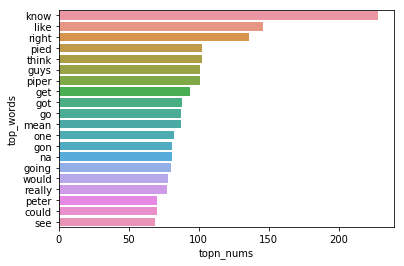

In [20]:
def plot_word_count():
    topn = 20
    cnt = Counter(words_list)
    most_common = cnt.most_common(topn)
    top_words = [each[0] for each in most_common]
    topn_nums = [each[1] for each in most_common]
    df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))
    
 
    ax = sns.barplot(x="topn_nums", y="top_words", data=df)

plot_word_count()

### N-grams .
first of all, make a list of lists where each internal list is a sentence that is tokenized into words.

In [6]:
def get_sents_list_season(season):
    sents_list = []
    with io.open(r'SiliconValley/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            doc = nlp(line)
            for sent in doc.sents:
                sents_list.append(sent)
    sents_token_list = []
    for sent in sents_list:
        token_list = [token for token in sent]
        sents_token_list.append(token_list)
            
            
                    
    return sents_token_list

sents_token_list = get_sents_list_season('01')

In [7]:

sentences = [[token.text.lower() for token in sent if token.is_punct==False and token.is_space==False] for sent in sents_token_list]

def analyze_ngrams(n):
    cnt = Counter()
    for sent in sentences:
        if len(sent) >= n:
            cnt.update(" ".join(n) for n in ngrams(sent, n))
    
    print(cnt.most_common(20))
    return cnt


cnt = analyze_ngrams(4)



[("i do n't know", 34), ('the world a better', 21), ('world a better place', 21), ('making the world a', 19), ("i 'm gon na", 19), ("i do n't think", 15), ("i 'm going to", 11), ("i do n't want", 8), ("do n't want to", 8), ("why do n't you", 7), ("'re not gon na", 7), ('always blue always blue', 6), ("we 're gon na", 6), ("do n't have to", 5), ("and i do n't", 5), ("we 've got a", 5), ("yeah i do n't", 5), ("i think i 'm", 5), ('down ten million dollars', 5), ("i 'm just gon", 5)]

['know', 'like', 'right', 'pied', 'think', 'guys', 'piper', 'get', 'got', 'go']

[228, 146, 136, 102, 102, 101, 101, 94, 88, 87]

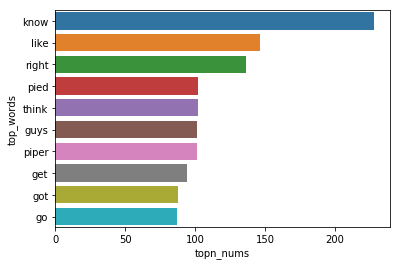

In [21]:
def plot_ngram(N, top_n, cnt):
    topn_list = cnt.most_common(top_n)
    topn_words = [each[0] for each in topn_list]
    print(topn_words)
    topn_nums = [each[1] for each in topn_list]
    print(topn_nums)
    
    df = pd.DataFrame(dict(top_words=topn_words, topn_nums=topn_nums))
    sns.barplot(x="topn_nums", y="top_words", data=df)

    
    
plot_ngram(3, 10, cnt)